# HW 4 Task 2 False Color Imagery

Author: Haylee Oyler

**Link to github repo:** https://github.com/haylee360/eds220-hwk4 

## About

**Purpose:** This notebook details the steps to visualize landsat multispectral geospatial data for the 2017 Thomas Fire. The Thomas Fire, which burned over 280,000 acres in Ventura and Santa Barbara counties in December 2017, was one of California’s largest wildfires at the time. It caused widespread ecological damage, displaced communities, and left lasting environmental impacts.

False color imagery, created using satellite data from instruments like Landsat, is a useful tool for monitoring wildfire impacts. By assigning infrared bands to visible colors, these images highlight vegetation health, burn severity, and the extent of fire scars. This approach helps researchers and land managers assess recovery efforts, identify high-risk areas, and plan restoration strategies.

This notebook will create a false color image of the Thomas Fire using remote sensing data, highlighting the fire scar and exploring how coding and data visualization support environmental monitoring.

**Highlights:** 
- Import and explore landsat data
- Construct a true color image of the Thomas Fire
- Construct a false color image of the Thomas Fire
- Visualize the Thomas Fire false color scar with the fire perimeter data

**About the Data:** The landsat data is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. It was pre-processed in the Microsoft Planetary data catalogue to remove data outside land and coarsen the spatial resolution

**References:** [Landsat Data](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) from Microsoft's Planetary Computer Data Catalogue.

- Earth Resources Observation and Science (EROS) Center. (2020). Landsat 4-5 Thematic Mapper Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9IAXOVV
- Earth Resources Observation and Science (EROS) Center. (2020). Landsat 7 Enhanced Thematic Mapper Plus Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9C7I13B
- Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6

All materials were created by [Carmen Galaz-Garcia](https://github.com/carmengg) for [EDS-220: Working with Environmental Data](https://meds-eds-220.github.io/MEDS-eds-220-course/).

### Import data and explore 

In [ ]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr

from shapely.geometry import box  # To create polygon bounding box

# Change display settings to see all column names
pd.set_option("display.max.columns", None)

# Import landsat nc
landsat = rioxr.open_rasterio(os.path.join('data',
                                    'landsat8-2018-01-26-sb-simplified.nc')
                                    )

# Import fire perimeter data
thomas_boundary = gpd.read_file(os.path.join('data',
                                    'thomas_boundary.geojson'))

In [2]:
# View the landsat data
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [3]:
# Examine raster attributes using rio accessor
print('Height: ', landsat.rio.height)
print('Width: ', landsat.rio.width, '\n')

print('Spatial bounding box: ')
print(landsat.rio.bounds(), '\n')

print('CRS: ', landsat.rio.crs)

Height:  731
Width:  870 

Spatial bounding box: 
(121170.0, 3755160.0, 356070.0, 3952530.0) 

CRS:  EPSG:32611


#### Data description

Our landsat data contains the variables `red`, `green`, `blue`, `nir08`, and `swir22`. These are different bands of our lansat data. The dimensions of our data for each band are an (x,y) coordinate of projection of (870, 731). The CRS is EPSG: 32611 and the height and width of the data are 731 and 870. Each variable in our dataset contains the dimensions (band, y, x).

In [4]:
# Remove the band dimension and variable
landsat = landsat.squeeze().drop_vars('band')

# Confirm it was removed correctly
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

### Visualize the Thomas Fire with true color imagery

In [2]:
# Visualize the landsat data 
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

NameError: name 'landsat' is not defined

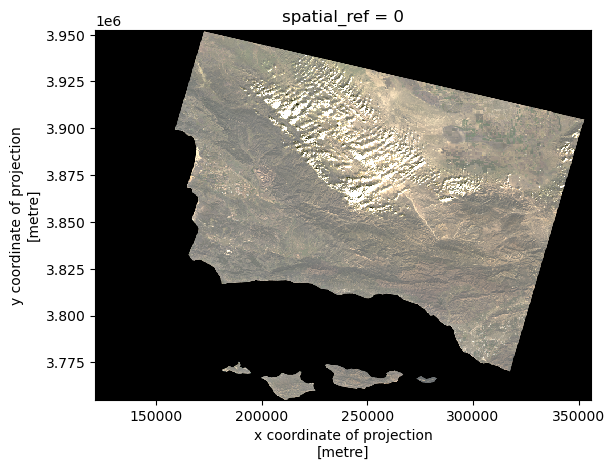

In [6]:
# Visualize the landsat data using true color imagery
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

After we adjusted the scale for plotting the bands, we got a much more comprehensible image. The clouds were throwing off the scale for plotting. The `robust=True` argument allows us infer a different set vmin and vmax values to properly color the image. It takes out the 2nd and 98th percentile, removing outliers which makes it easier to visualize. 

Next, we will use false color imagery to view the fire...

### Visualize the Thomas Fire with false color imagery

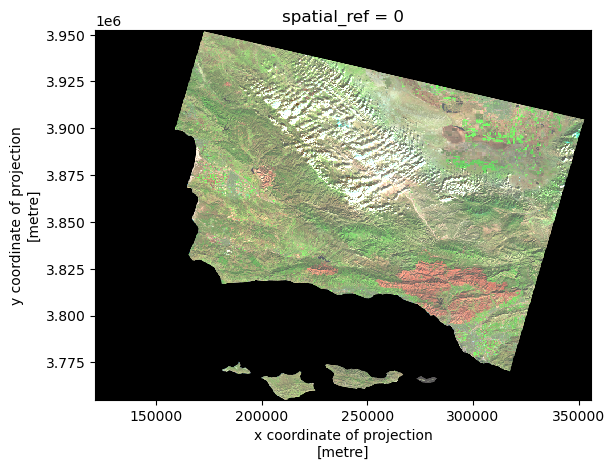

In [7]:
# Visualize the landsat data using false color imagery
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

In [1]:
# Reproject data to match the CRS between our two datasets
thomas_boundary= thomas_boundary.to_crs("EPSG:4326")
landsat = landsat.rio.reproject("EPSG:4326")

# Confirm that the CRS of our data match
landsat.rio.crs == thomas_boundary.crs

NameError: name 'thomas_boundary' is not defined

### Map the Thomas Fire scar and boundary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


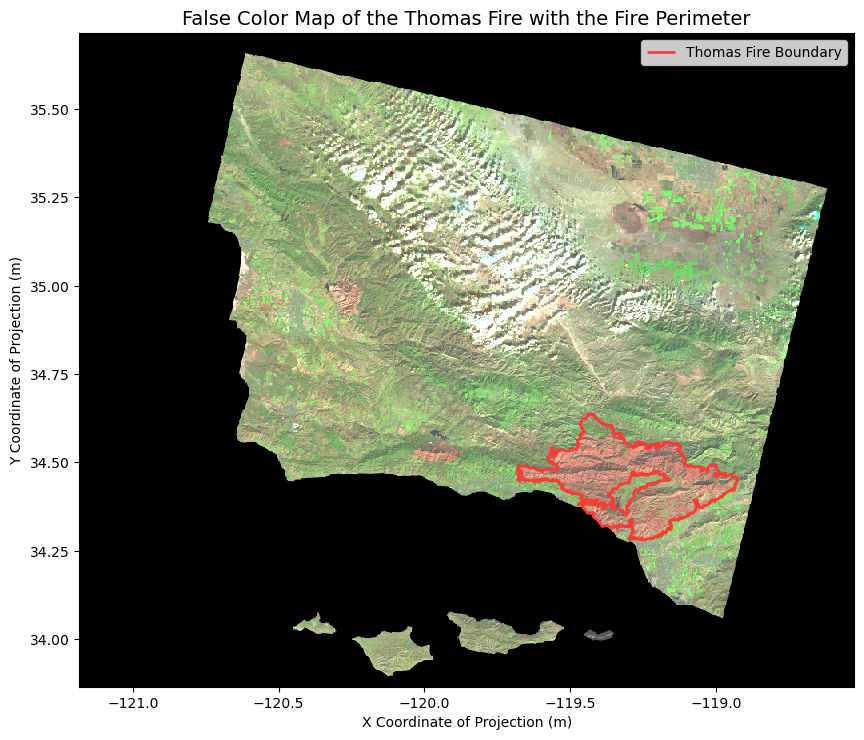

<Figure size 640x480 with 0 Axes>

In [13]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, 
                                                        robust = True)
ax.legend()

thomas_boundary.boundary.plot(ax=ax, 
                            edgecolor='#f83c36', 
                            linewidth=2, 
                            label='Thomas Fire Boundary')

ax.legend()

# Remove axis for a cleaner map and set title
ax.set_title('False Color Map of the Thomas Fire with the Fire Perimeter',
            fontsize=14)
ax.set_xlabel('X Coordinate of Projection (m)')
ax.set_ylabel('Y Coordinate of Projection (m)')
ax.set_facecolor("white")
plt.figure(facecolor='yellow')

plt.show()

**Figure Description**

This map shows a false color image of the Thomas Fire in Santa Barbara and Ventura Counties. The fire boundary is outlined in red. Sateillite data works with wavelengths of light beyond what the human eye can see. False color imagery is the process of assigning colors to these wavelengths (i.e. near-infared and short-wave infared). In our map, we've chosen to visualize short-wave infared as red, near-infared as green, and red wavelengths as blue. This lets us produce an image that highlights exactly where the fire scar is, as opposed to the true color image where you it is much harder to distinguish. A true color image assigns the red, green, and blue wavelengths of light to the correct corresponding colors.